eda overview

import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


load cleaned dataset


In [4]:
df = pd.read_csv("profit_leakage_cleaned.csv")
df.head()


,order_id,order_date,customer_id,customer_type,region,sales_channel,product_id,product_category,unit_cost,unit_price,...,refund_amount,inventory_level,reorder_level,holding_cost,payment_delay_days,outstanding_amount,supplier_delay_days,logistics_cost,operational_cost,profit_margin_percent
0,1,2022-01-01 00:00:00,16795,Retail,North,Distributor,435,Automobile,4829.88,888.93,...,0.0,483,189,33.15,18,0.000000,24,659.09,78.99,-455.20
1,2,2022-01-01 00:01:00,1860,Corporate,North,Distributor,235,Pharma,3173.46,4089.16,...,0.0,11,182,208.42,10,0.000000,29,871.93,278.40,-0.05
2,3,2022-01-01 00:02:00,39158,Wholesale,East,Online,729,Electronics,3498.54,3923.52,...,0.0,260,183,346.40,69,71721.553248,11,946.05,1743.35,7.04
3,4,2022-01-01 00:03:00,45732,Retail,South,Distributor,1939,Furniture,628.06,851.16,...,0.0,202,53,43.85,41,4085.993580,17,833.95,716.21,22.22
4,5,2022-01-01 00:04:00,12284,Retail,North,Online,1670,Pharma,1257.04,3229.26,...,0.0,152,185,19.90,21,0.000000,25,540.11,1732.09,32.47


dataset shape

In [5]:
df.shape


(100000, 28)

column overview

In [6]:
df.columns


Index(['order_id', 'order_date', 'customer_id', 'customer_type', 'region',
       'sales_channel', 'product_id', 'product_category', 'unit_cost',
       'unit_price', 'quantity_sold', 'revenue', 'cost', 'discount_percent',
       'discount_amount', 'net_revenue', 'profit', 'return_flag',
       'refund_amount', 'inventory_level', 'reorder_level', 'holding_cost',
       'payment_delay_days', 'outstanding_amount', 'supplier_delay_days',
       'logistics_cost', 'operational_cost', 'profit_margin_percent'],
      dtype='object')

univariate analysis

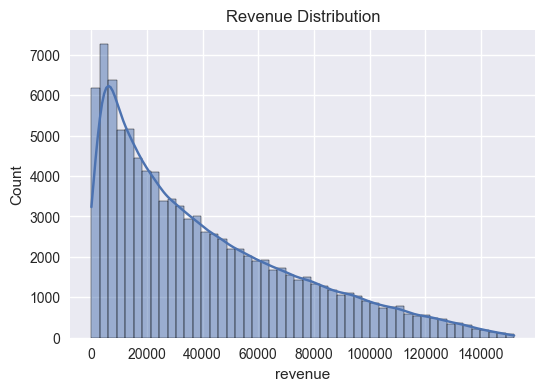

In [8]:
# revenue distribution
plt.figure(figsize=(6,4))
sns.histplot(df["revenue"], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.show()


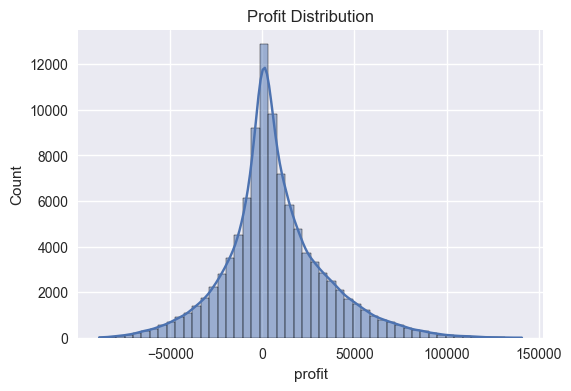

In [9]:
#profit distribution
plt.figure(figsize=(6,4))
sns.histplot(df["profit"], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()


outlier detection

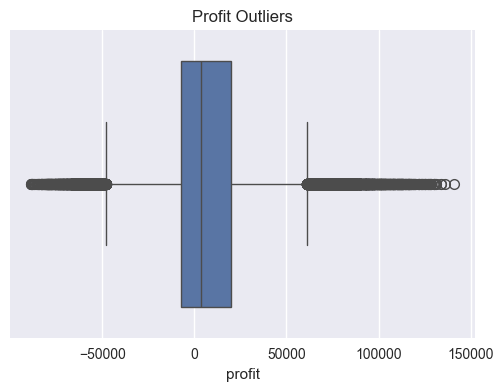

In [10]:
#profit outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df["profit"])
plt.title("Profit Outliers")
plt.show()


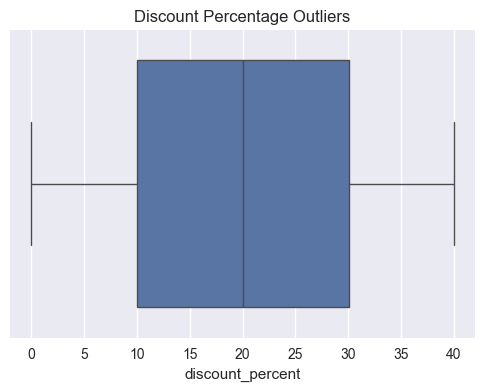

In [11]:
#discount percent outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df["discount_percent"])
plt.title("Discount Percentage Outliers")
plt.show()


bivariate analysis

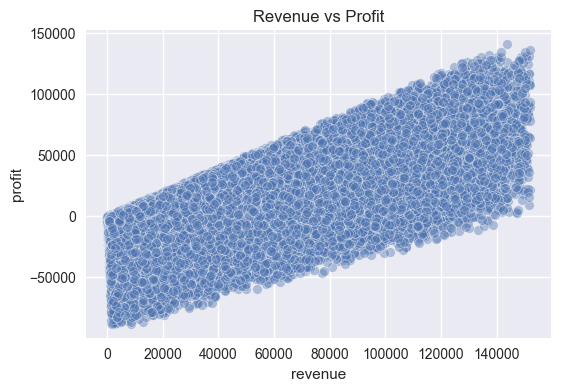

In [12]:
# revenue vs profit
plt.figure(figsize=(6,4))
sns.scatterplot(x="revenue", y="profit", data=df, alpha=0.4)
plt.title("Revenue vs Profit")
plt.show()


category-wise analysis

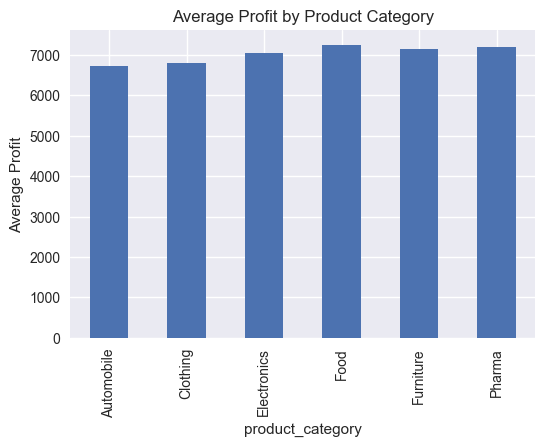

In [13]:
#avg profit by product category
plt.figure(figsize=(6,4))
df.groupby("product_category")["profit"].mean().plot(kind="bar")
plt.title("Average Profit by Product Category")
plt.ylabel("Average Profit")
plt.show()


region wise revenue


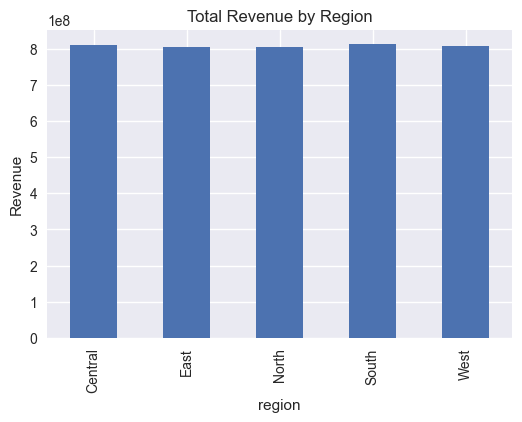

In [14]:
plt.figure(figsize=(6,4))
df.groupby("region")["revenue"].sum().plot(kind="bar")
plt.title("Total Revenue by Region")
plt.ylabel("Revenue")
plt.show()


correlation heat map

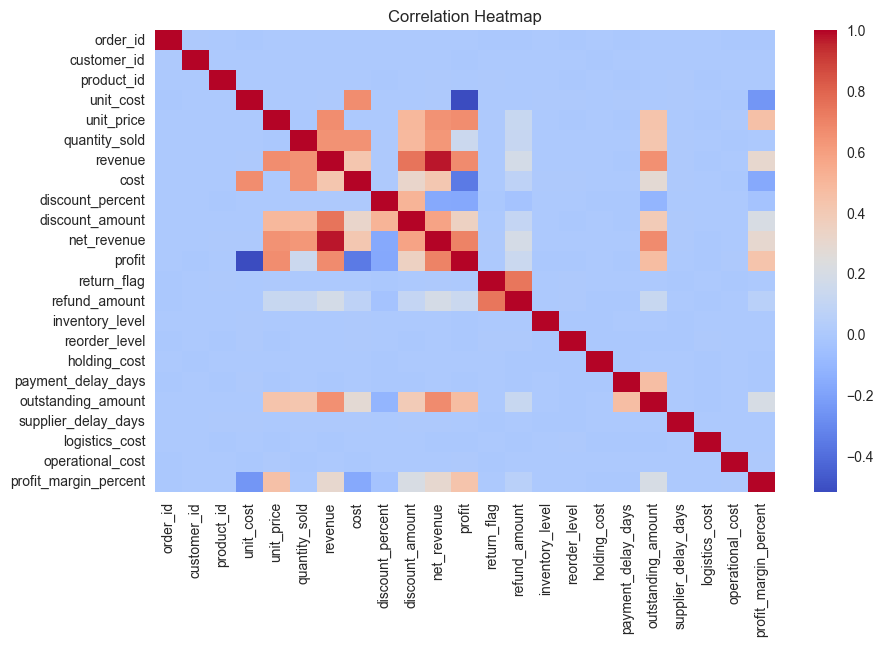

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Correlation Heatmap")
plt.show()
